<a href="https://colab.research.google.com/github/oluwatunbi/Dog-Vision/blob/main/Dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The End to end dog vision project

1. Problem
Trying to know the breed of a dog
2. Data
getting the data from Kaggel
3. Evaluation
 The evaluation is a file using the prediction probability for each dog breed of each test image
4. Features
We are dealing with 120 breeds of dogs

```
# This is formatted as code
```



In [ ]:
#!unzip "drive/MyDrive/Dog vision/dog-breed-identification.zip" -d "drive/MyDrive/Dog vision"

In [ ]:
# Import Tensor flow and Tensor flow hub
import tensorflow as tf
import tensorflow_hub as hub

print("Version tensor:", tf.__version__)
print("Version tensorhub:", hub.__version__)

# Check for GPU|
print("GPU", "available yes ..." if tf.config.list_physical_devices("GPU") else "Not available :( )")

Version tensor: 2.18.0
Version tensorhub: 0.16.1
GPU Not available :( )


# Getting the data

In [ ]:
import pandas as pd
label_csv = pd.read_csv("drive/MyDrive/Dog vision/labels.csv")
print(label_csv.describe())
print(label_csv.head)

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
<bound method NDFrame.head of                                      id                     breed
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220

In [ ]:
print(label_csv.head())

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


<Axes: xlabel='breed'>

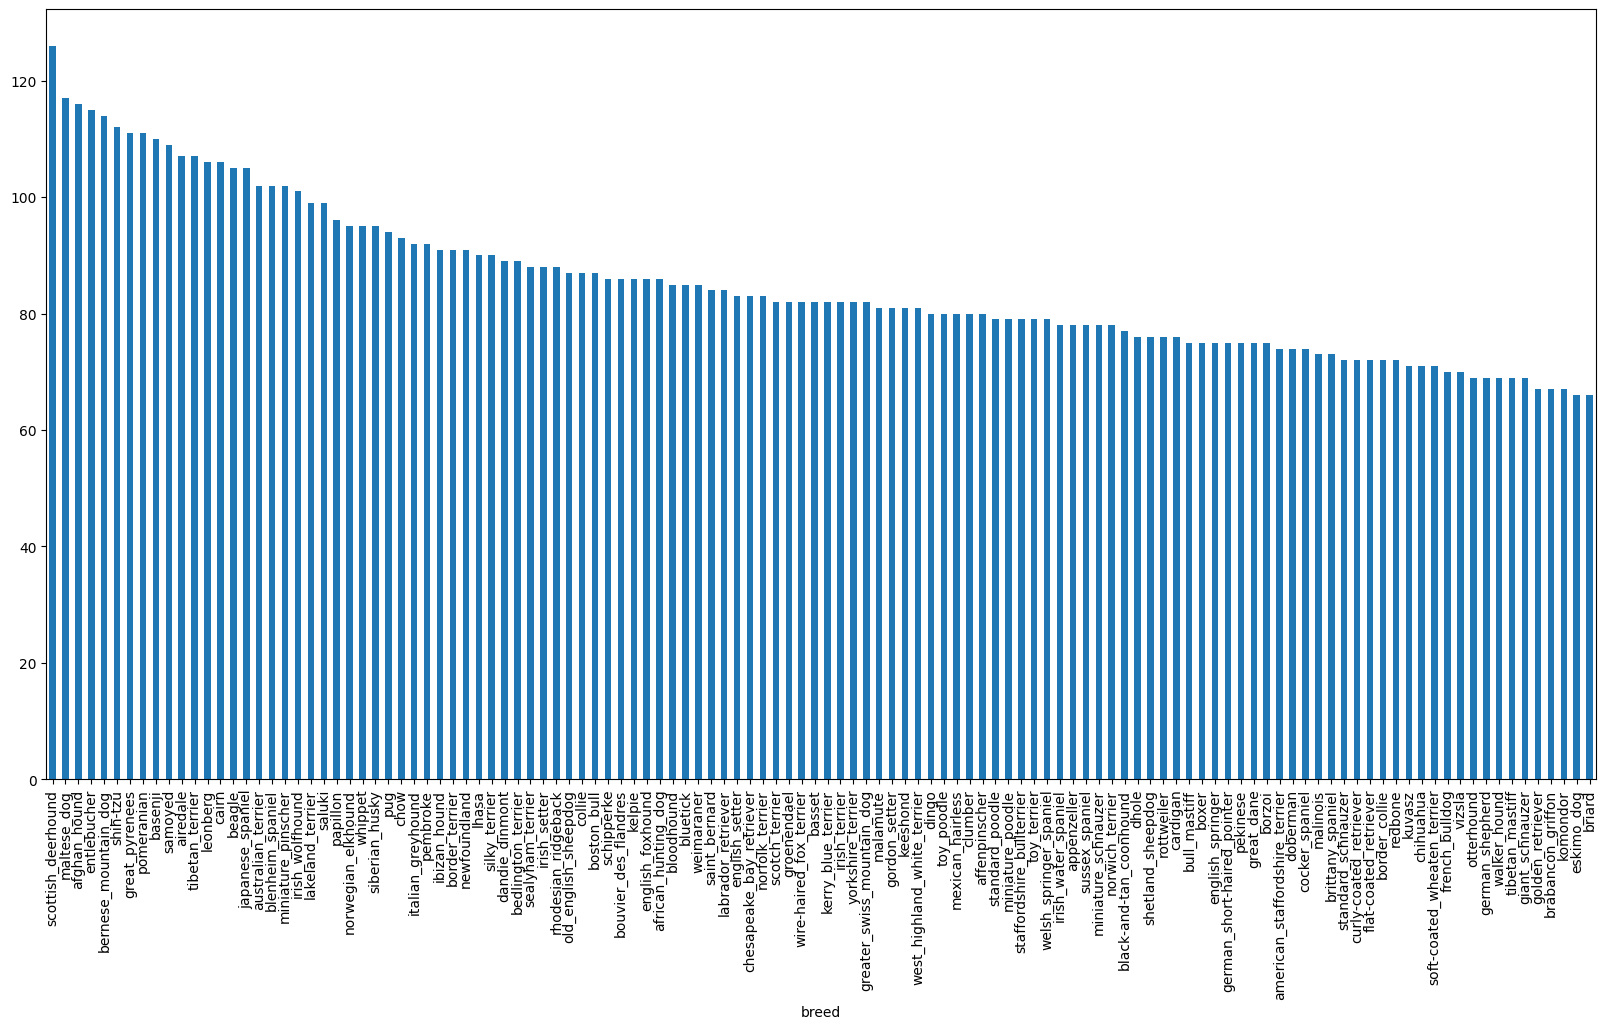

In [ ]:
# hoow many images are in each breed
label_csv.breed.value_counts().plot.bar(figsize =(20, 10))

**Getting images and their labels**
Since we've got the image ID's and their labels in a DataFrame (labels_csv), we'll use it to create:


    

*   A list a filepaths to training images
*   An array of all labels








An array of all unique labels
We'll only create a list of filepaths to images rather than importing them all to begin with. This is because working with filepaths (strings) is much efficient than working with images.

In [ ]:
# create a pathway ffrom image id

filename = ["drive/MyDrive/Dog vision/train/" + fname + ".jpg"  for fname in label_csv["id"]]
filename[:10]

['drive/MyDrive/Dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

Now we've got a list of all the filenames from the ID column of labels_csv, we can compare it to the number of files in our training data directory to see if they line up.
If they do, great. If not, there may have been an issue when unzipping the data (what we did above), to fix this, you might have to unzip the data again. Be careful not to let your Colab notebook disconnect whilst unzipping.


In [ ]:
# check weather the number of filename corresponds actual image in dogvision
import os
if len(os.listdir("drive/MyDrive/Dog vision/train")) == len(filename):
  print("Yes we are good")
else:
  print("Not completeed")

Yes we are good


If everything worked, we should see a match up.

Let's do one more check. Visualizing directly from a filepath.


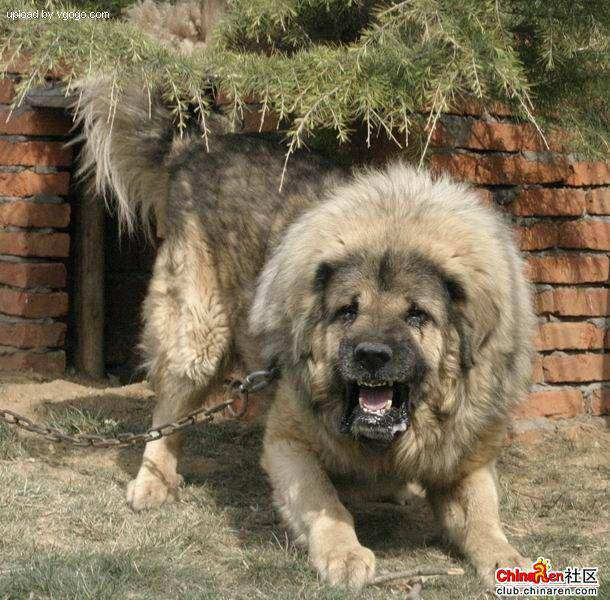

In [ ]:
from IPython.display import display, Image
Image(filename[9000])

In [ ]:
# WE will take the label_csv and turn to numpy arrays
import pandas as pd
import numpy as np
labels = label_csv["breed"].to_numpy()
print(labels)

['boston_bull' 'dingo' 'pekinese' ... 'airedale' 'miniature_pinscher'
 'chesapeake_bay_retriever']


In [ ]:
len(labels)

10222

In [ ]:
# check if number of labels matched filename
if len(labels) == len(filename):
  print("we are good")
else:
  print(" Not good")

we are good


To begin with, we'll find all of the unique dog breed names.

Then we'll go through the list of labels and compare them to unique breeds and create a list of booleans indicating which one is the real label (True) and which ones aren't (False).

In [ ]:
# find the unique breed
unique_breed = np.unique(labels)
unique_breed


array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
len(unique_breed)

120

In [ ]:
# Turn a single label into a boolean
print(labels[0])
labels[0] == unique_breed


boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# turn everthing into a boolean
label_boolean = [label == unique_breed for label in labels]
label_boolean[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

Why do it like this?

Remember, an important concept in machine learning is converting your data to numbers before passing it to a machine learning model.

In this case, we've transformed a single dog breed name such as boston_bull into a one-hot array.

Let's see an example.

In [ ]:
# convert the boolean values to numbers
print(labels[0])
print(np.where(unique_breed == labels[0]))
print(label_boolean[0].argmax())
print(label_boolean[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


Since from kaggle there is no validation set, we will make one ourself

# Creating our own validation

Since the dataset from Kaggle doesn't come with a validation set (a split of the data we can test our model on before making final predicitons on the test set), let's make one.

We could use Scikit-Learn's train_test_split function or we could simply make manual splits of the data.

For accessibility later, let's save our filenames variable to X (data) and our labels to y.

In [ ]:
# create x and y set
X = filename
Y = label_boolean

Since we're working with 10,000+ images, it's a good idea to work with a portion of them to make sure things are working before training on them all.

This is because computing with 10,000+ images could take a fairly long time. And our goal when working through machine learning projects is to reduce the time between experiments.

Let's start experimenting with 1000 and increase it as we need.

We are going to start up by experimenting on first 1000 images

In [ ]:
# set number of image to use experimenting
NUM_IMAGES = 1000 #@param {type: "slider", min: 1000, max: 10000 }

In [ ]:
# let split our data into training and validation set
from sklearn.model_selection import train_test_split

# split into training and valuidation set using NUM_IMAGES
X_train, X_val, Y_train, Y_val = train_test_split(X[:NUM_IMAGES],
                                                  Y[:NUM_IMAGES],
                                                  test_size= 0.2,
                                                  random_state = 42)

len(X_train), len(X_val), len(Y_train), len(Y_val)

(800, 200, 800, 200)

# Preprocessing Image(Turning images into tensors)
Our labels are in numeric format but our images are still just file paths.

Since we're using TensorFlow, our data has to be in the form of Tensors.

A Tensor is a way to represent information in numbers. If you're familar with NumPy arrays (you should be), a Tensor can be thought of as a combination of NumPy arrays, except with the special ability to be used on a GPU.

To preprocess our images into Tensors we're going to write a function which does a few things:

1.   Takes an image filename as input.
2.   Uses TensorFlow to read the file and save it to a variable, image.
3.   Turn our image (a jpeg file) into Tensors.
4.   Resize the image to be of shape (224, 224).
5.   Return the modified image.







In [ ]:
# Convert image into numpy array
from matplotlib.pyplot import imread
image = imread(filename[42])
image.shape

(257, 350, 3)

Notice the shape of image. It's (257, 350, 3). This is height, width, colour channel value.

And you can easily convert it to a Tensor using tf.constant().

In [ ]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [ ]:
# create a function
IMG_size = 224

def process_image(image_path):
  """
  Takes an image file path and turn into tensor
  """
  # Read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels = 3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size = [IMG_size, IMG_size])
  return image

# Creating Data batches

A batch (also called mini-batch) is a small portion of your data, say 32 (32 is generally the default batch size) images and their labels. In deep learning, instead of finding patterns in an entire dataset at the same time, you often find them one batch at a time.

Let's say you're dealing with 10,000+ images (which we are). Together, these files may take up more memory than your GPU has. Trying to compute on them all would result in an error.

Instead, it's more efficient to create smaller batches of your data and compute on one batch at a time.

In [ ]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label


Now we've got a simple function to turn our image file path names and their associated labels into tuples (we can turn these into Tensors next), we'll create a function to make data batches.

Because we'll be dealing with 3 different sets of data (training, validation and test), we'll make sure the function can accomodate for each set.

We'll set a default batch size of 32 because according to Yann Lecun (one of the OG's of deep learning), friends don't let friends train with batch sizes over 32.

In [ ]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batch(X, Y= None, batch_size = BATCH_SIZE, valid_data = False, test_data = False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # Ensure only one of the valid_data or test_data is true
  if valid_data and test_data:
    raise ValueError("Cannot set both valid_data and test_data to True")
  # Ensure valid_data and test_data set are boolean
  if not isinstance(valid_data, bool):
    raise ValueError("valid_data must be a boolean value")
  if not isinstance(test_data, bool):
    raise ValueError("test_data must be a boolean value")

  # If the data is a test data set we prbably dont have a label
  if test_data:
    print("working with the test dataset ...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepath
    data_batch = data.map(process_image).batch(batch_size)
    return data_batch
  # if data is a valid dataset we dont need to shuffle
  elif valid_data:
    print("working with the valid dataset")
    data =tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepath
                                             tf.constant(Y) )) # labels
    data_batch = data.map(get_image_label).batch(batch_size)
    return data_batch
  else:
    # if data the tarining dataset then we shuffle
    print("working with the training dataset....")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepath
                                              tf.constant(Y))) # labels
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size = len(X))
    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)
    # turn data into batch
    data_batch = data.batch(batch_size)
    return data_batch





In [ ]:
# create training and validation data_batch
train_data = create_data_batch(X_train, Y_train)
valid_data = create_data_batch(X_val, Y_val, valid_data = True)

working with the training dataset....
working with the valid dataset


Visualising data batches

In [ ]:
import matplotlib.pyplot as plt

# craete function for viewing images in the data batches
def show_25_image(images, label):
  """
  Display 25 images from the data batches
  """
  # set up figure
  plt.figure(figsize = (10,10))
  # loop throught the 25 images
  for i in range(25):
    # craetae a subplot
    ax = plt.subplot(5,5, i+1)
    # display an images
    plt.imshow(images[i])
    # add image label to the title
    plt.title(unique_breed[label[i].argmax()])
    # turn grid off
    plt.axis("off")



To make computation efficient, a batch is a tighly wound collection of Tensors.

So to view data in a batch, we've got to unwind it.

We can do so by calling the [`as_numpy_iterator()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#as_numpy_iterator) method on a data batch.

This will turn our a data batch into something which can be iterated over.

Passing an iterable to [`next()`](https://docs.python.org/3/library/functions.html#next) will return the next item in the iterator.

In our case, next will return a batch of 32 images and label pairs.

**Note:** Running the cell below and loading images may take a little while.


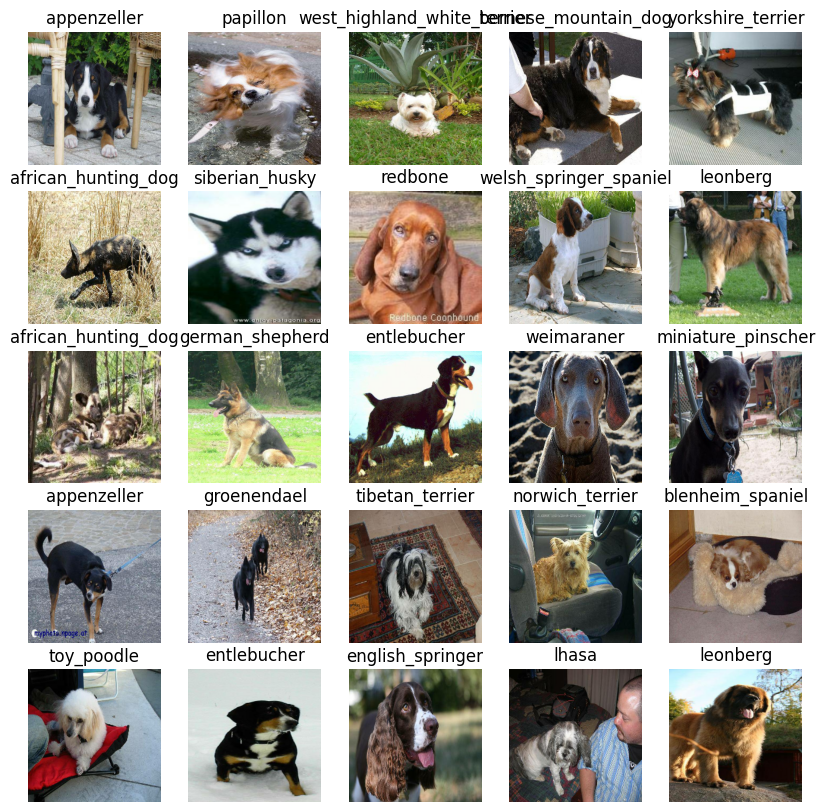

In [ ]:
# Visualize training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_image(train_images, train_labels)

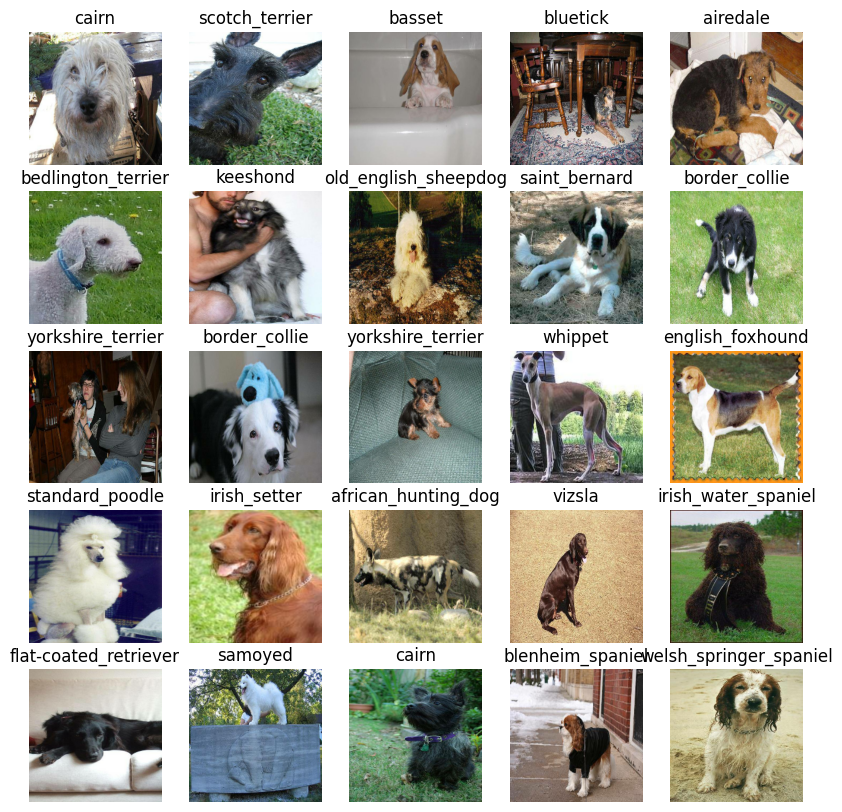

In [ ]:
# Visualize training images from the training data batch
valid_images, valid_labels = next(valid_data.as_numpy_iterator())
show_25_image(valid_images, valid_labels)

Creating and training a model

Now our data is ready, let's prepare it modelling. We'll use an existing model from [TensorFlow Hub](https://tfhub.dev/).

TensorFlow Hub is a resource where you can find pretrained machine learning models for the problem you're working on.

Using a pretrained machine learning model is often referred to as transfer learning.


Building a model

>  Before we build a model, there are a few things we need to define:
* The input shape (images, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use.



In [ ]:
# Setup input shape of the model
INPUT_SHAPE = [None, IMG_size, IMG_size, 3] # batch, height, width, colour channels
# Setup output shape o the model
OUTPUT_SHAPE = len(unique_breed)
# Setup model URL for tensor flow hub
model_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

Defining a deep learning model in Keras can be as straightforward as saying, "here are the layers of the model, the input shape and the output shape, let's go!"

Knowing this, let's create a function which:
* Takes the input shape, output shape and the model we've chosen's URL as parameters.
* Defines the layers in a Keras model in a sequential fashion (do this first, then this, then that).
* Compiles the model (says how it should be evaluated and improved).
* Builds the model (tells it what kind of input shape it'll be getting).
* Returns the model.

In [ ]:
# craete a function which build kera model
def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_URL = model_URL ):
  print("Building model with:", model_URL)

  # setup the model layer
  model = tf.keras.Sequential([
      tf.keras.layers.InputLayer(input_shape = INPUT_SHAPE), # define input layer explicitly
      # wrap hub.keraslayers in lambda layer
      tf.keras.layers.Lambda(lambda x: hub.KerasLayer(model_URL)(x)),
      tf.keras.layers.Dense(units = OUTPUT_SHAPE,
                            activation = "softmax") #layer 2 output layer

  ])

  # compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ["accuracy"]
  )


  return model





Build a Model

We use `model.build()` whenever we're using a layer from TensorFlow Hub to tell our model what input shape it can expect.

In this case, the input shape is `[None, IMG_SIZE, IMG_SIZE, 3]` or `[None, 224, 224, 3]` or `[batch_size, img_height, img_width, color_channels]`.

Batch size is left as `None` as this is inferred from the data we pass the model. In our case, it'll be 32 since that's what we've set up our data batches as.

Now we've gone through each section of the function, let's use it to create a model.

We can call `summary()` on our model to get idea of what our model looks like.

In [ ]:
# Create a model and check its details
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                      │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Creating callbacks

We've got a model ready to go but before we train it we'll make some callbacks.

Callbacks are helper functions a model can use during training to do things such as save a models progress, check a models progress or stop training early if a model stops improving.

The two callbacks we're going to add are a TensorBoard callback and an Early Stopping callback.

#### TensorBoard Callback

[TensorBoard](https://www.tensorflow.org/tensorboard/get_started) helps provide a visual way to monitor the progress of your model during and after training.

It can be used [directly in a notebook](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks) to track the performance measures of a model such as loss and accuracy.

To set up a TensorBoard callback and view TensorBoard in a notebook, we need to do three things:
1. Load the TensorBoard notebook extension.
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function.
3. Visualize the our models training logs using the `%tensorboard` magic function (we'll do this later on).

In [ ]:
# load the tensor borad notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# create function to build tensorboard callback
def create_tensorboard_callback():
  # craete a directory for storing tensorboard logs
  logdir = os.path.join("drive/MyDrive/Dog vision/Logs",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

  return tf.keras.callbacks.TensorBoard(logdir)

#### Early Stopping Callback

[Early stopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) helps prevent overfitting by stopping a model when a certain evaluation metric stops improving. If a model trains for too long, it can do so well at finding patterns in a certain dataset that it's not able to use those patterns on another dataset it hasn't seen before (doesn't generalize).

It's basically like saying to our model, "keep finding patterns until the quality of those patterns starts to go down."

In [ ]:
# create early stooping calls (once our model stop improving and traing stop)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy",
                                                  patience = 3) # stop after 3 rounds of no improviment


### Training a model (on a subset of data)
Our first model is only going to be trained on 1000 images. Or trained on 800 images and then validated on 200 images, meaning 1000 images total or about 10% of the total data.

We do this to make sure everything is working. And if it is, we can step it up later and train on the entire training dataset.

The final parameter we'll define before training is `NUM_EPOCHS` (also known as **number of epochs**).

`NUM_EPOCHS` defines how many passes of the data we'd like our model to do. A pass is equivalent to our model trying to find patterns in each dog image and see which patterns relate to each label.
If `NUM_EPOCHS=1`, the model will only look at the data once and will probably score badly because it hasn't a chance to correct itself. It would be like you competing in the international hill descent championships and your friend Adam only being able to give you 1 single instruction to get down the hill.

What's a good value for `NUM_EPOCHS`?

This one is hard to say. 10 could be a good start but so could 100. This is one of the reasons we created an early stopping callback. Having early stopping setup means if we set `NUM_EPOCHS` to 100 but our model stops improving after 22 epochs, it'll stop training.

Along with this, let's quickly check if we're still using a GPU.

In [ ]:
# Check again if GPU is available (otherwise computing will take a looooonnnnggggg time)
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU not available :(


In [ ]:
# how many round should we use the model to look through the data
NUM_EPOCHS = 100 #@param {type: "slider", min: 10, max: 100, step:10}

Boom! We've got a GPU running and `NUM_EPOCHS` setup. Let's create a simple function which trains a model. The function will:
* Create a model using `create_model()`.
* Setup a TensorBoard callback using `create_tensorboard_callback()` (we do this here so it creates a log directory of the current date and time).
* Call the `fit()` function on our model passing it the training data, validatation data, number of epochs to train for and the callbacks we'd like to use.
* Return the fitted model.

In [ ]:
# build a function to train and return trained model
def train_model():
  """
  Train a given model and return the trained vaersion
  """
  # create a model
  model = create_model()

  # create new tensorboard session everytime we traina model
  tensorboard = create_tensorboard_callback()

  # fit the model to the data pass it the callbacks we created
  model.fit(x = train_data,
            epochs = NUM_EPOCHS,
            validation_data = valid_data,
            validation_freq = 1, # check validation metric every epochs
            callbacks = [tensorboard, early_stopping])
  return model

In [ ]:
# fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 597s 24s/step - accuracy: 0.0507 - loss: 5.0150 - val_accuracy: 0.3000 - val_loss: 3.3051
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 109s 3s/step - accuracy: 0.6617 - loss: 1.8073 - val_accuracy: 0.5550 - val_loss: 2.0870
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.9377 - loss: 0.6389 - val_accuracy: 0.6350 - val_loss: 1.6523
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.9846 - loss: 0.2584 - val_accuracy: 0.6400 - val_loss: 1.4715
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 1.0000 - loss: 0.1425 - val_accuracy: 0.6650 - val_loss: 1.3929
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 1.0000 - loss: 0.0983 - val_accuracy: 0.6800 - val_loss: 1.3588
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 1.0000 - loss: 0.0796 - val_accuracy: 0.6850 - val_loss: 1.3335
Epoch 8/100
25/

#### Checking the TensorBoard logs
Now our model has been trained, we can make its performance visual by checking the TensorBoard logs.

The TensorBoard magic function (`%tensorboard`) will access the logs directory we created earlier and viualize its contents.

In [ ]:
%tensorboard --logdir drive/MyDrive/Dog\ vision/Logs

## Making and evaluating predictions using a trained model

Before we scale up and train on more data, let's see some other ways we can evaluate our model. Because although accuracy is a pretty good indicator of how our model is doing, it would be even better if we could could see it in action.

Making predictions with a trained model is as calling `predict()` on it and passing it data in the same format the model was trained on.

In [ ]:
# make predictions on the validation data( not used to train )
prediction = model.predict(valid_data, verbose = 1 ) # verbose show us how long there is to go
prediction



Making predictions with our model returns an array with a different value for each label.

In this case, making predictions on the validation data (200 images) returns an array (`predictions`) of arrays, each containing 120 different values (one for each unique dog breed).

These different values are the probabilities or the likelihood the model has predicted a certain image being a certain breed of dog. The higher the value, the more likely the model thinks a given image is a specific breed of dog.

Let's see how we'd convert an array of probabilities into an actual label.

In [ ]:
# first predictions
print(prediction[0]) # first prediction
print(f"Max value (probability of prediction): {np.max(prediction[0])}") # max probability value predicted by the model
print(f"sum: {np.sum(prediction[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"argmax: {np.argmax(prediction[0])}") # the index of where the maxvalue of prediction occurs
print(f"predicted label: {unique_breed[np.argmax(prediction[0])]}") # predicted label


Having this information is great but it would be even better if we could compare a prediction to its true label and original image.

To help us, let's first build a little function to convert prediction probabilities into predicted labels.

**Note:** Prediction probabilities are also known as confidence levels.

In [ ]:

# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breed[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(prediction[])
pred_label

Wonderful! Now we've got a list of all different predictions our model has made, we'll do the same for the validation images and validation labels.

Remember, the model hasn't trained on the validation data, during the `fit()` function, it only used the validation data to evaluate itself. So we can use the validation images to visually compare our models predictions with the validation labels.

Since our validation data (`val_data`) is in batch form, to get a list of validation images and labels, we'll have to unbatch it (using [`unbatch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#unbatch)) and then turn it into an iterator using [`as_numpy_iterator()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#as_numpy_iterator).

Let's make a small function to do so.

In [ ]:
# create a function to unbatch a batch set
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # loop through unbatch data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breed[np.argmax(label)])
  return images, labels

# unbatchfy the validation data
valid_image, valid_lable = unbatchify(valid_data)
valid_image[0], valid_lable[0]


Nailed it!

Now we've got ways to get:
* Prediction labels
* Validation labels (truth labels)
* Validation images

Let's make some functions to make these all a bit more visualize.

More specifically, we want to be able to view an image, its predicted label and its actual label (true label).

The first function we'll create will:
* Take an array of prediction probabilities, an array of truth labels, an array of images and an integer.
* Convert the prediction probabilities to a predicted label.
* Plot the predicted label, its predicted probability, the truth label and target image on a single plot.

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n):
  """
  view the prediction, ground truth labels and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # get the pred label
  pred_label = get_pred_label(pred_prob)

  # plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.xtick([])

  # change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)* 100,
                                      true_label),
                                      color = color)

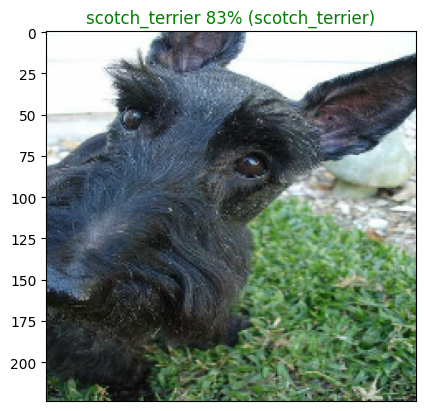

In [ ]:
# view an example prediction, Original image and truth label
plot_pred(prediction, valid_lable, valid_image, 1)